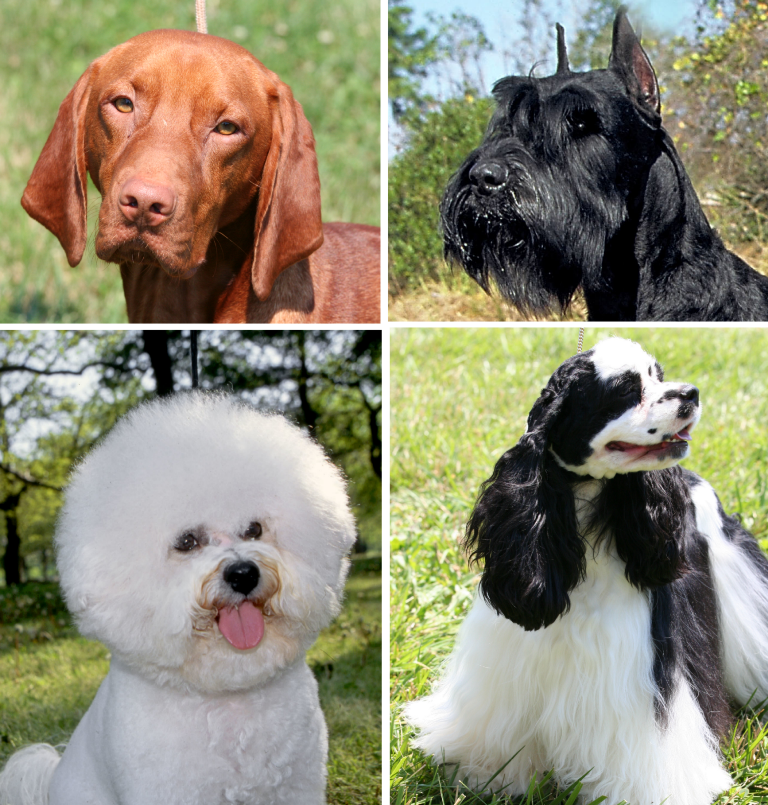

Similarity between image and text: 0.2632


In [2]:
# Check if necessary packages are installed, if not, install them
try:
    import torch
    import clip
    from PIL import Image
    from torchvision import transforms
    import requests
    from io import BytesIO
except ImportError:
    !pip install torch torchvision
    !pip install git+https://github.com/openai/CLIP.git
    !pip install pillow

    # After installing, import again
    import torch
    import clip
    from PIL import Image
    from torchvision import transforms
    import requests
    from io import BytesIO

# Function to load an image from URL
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return image

# Function to calculate similarity between image and text
def calculate_similarity(image, text_description):
    # Load the CLIP model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Preprocess the image
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Tokenize the text prompt
    text_input = clip.tokenize([text_description]).to(device)

    # Encode the image and the text
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_input)

    # Normalize the image and text features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate the similarity score
    similarity = (image_features @ text_features.T).item()

    return similarity

# Example usage
if __name__ == "__main__":
    # Example URL of the image
    image_url = "https://upload.wikimedia.org/wikipedia/commons/e/ea/Dog_coat_variation.png"

    # Load the image from URL
    image = load_image_from_url(image_url)

    # Example text description
    text_description = "Many dogs"

    # Calculate similarity
    similarity_score = calculate_similarity(image, text_description)

    # Display the image
    display(image)

    # Print the similarity score
    print(f"Similarity between image and text: {similarity_score:.4f}")


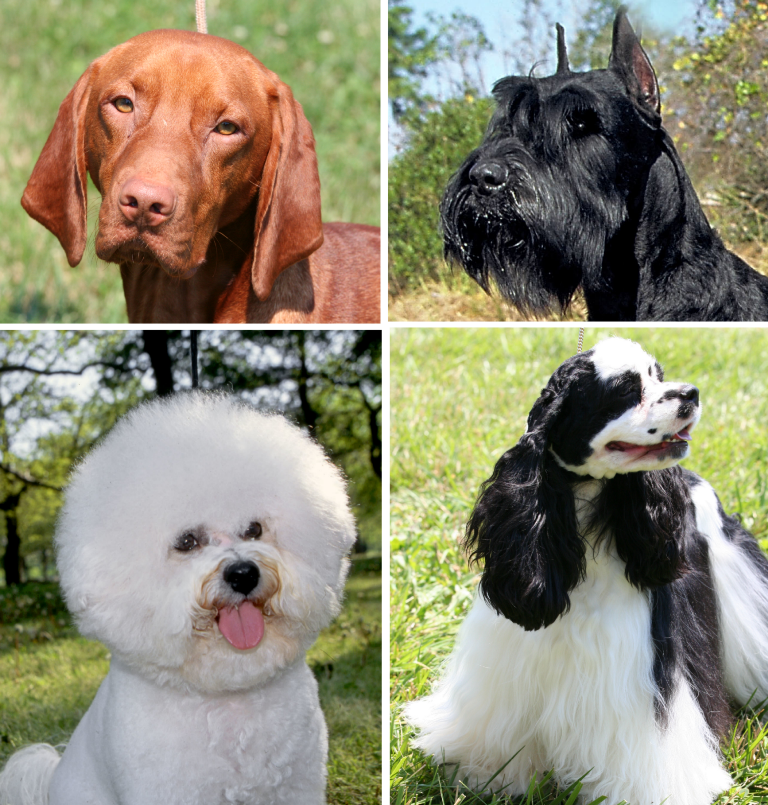

Similarity between image and text: 0.1725


In [3]:
# Example usage
if __name__ == "__main__":
    # Example URL of the image
    image_url = "https://upload.wikimedia.org/wikipedia/commons/e/ea/Dog_coat_variation.png"

    # Load the image from URL
    image = load_image_from_url(image_url)

    # Example text description
    text_description = "Many cats"

    # Calculate similarity
    similarity_score = calculate_similarity(image, text_description)

    # Display the image
    display(image)

    # Print the similarity score
    print(f"Similarity between image and text: {similarity_score:.4f}")

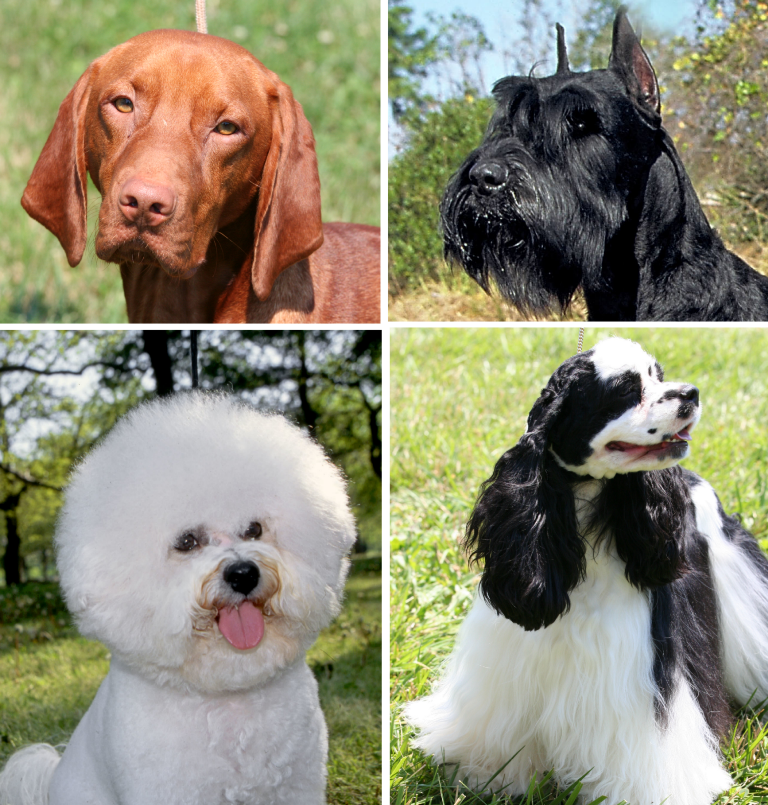

Similarity between image and text: 0.1183


In [4]:
# Example usage
if __name__ == "__main__":
    # Example URL of the image
    image_url = "https://upload.wikimedia.org/wikipedia/commons/e/ea/Dog_coat_variation.png"

    # Load the image from URL
    image = load_image_from_url(image_url)

    # Example text description
    text_description = "A calculator and a pencil"

    # Calculate similarity
    similarity_score = calculate_similarity(image, text_description)

    # Display the image
    display(image)

    # Print the similarity score
    print(f"Similarity between image and text: {similarity_score:.4f}")

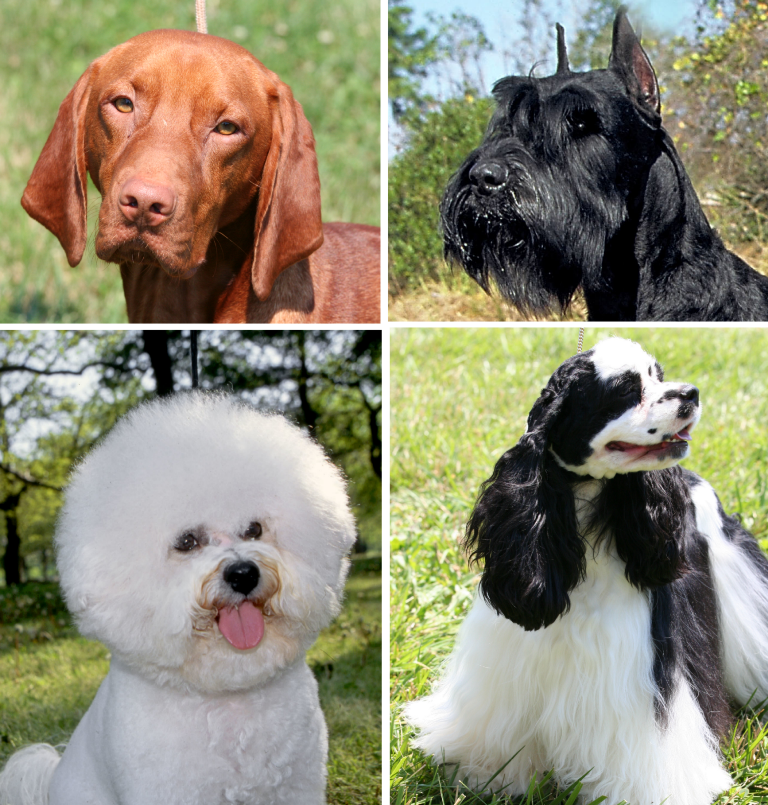

Similarity between image and text: 0.2893


In [5]:
# Example usage
if __name__ == "__main__":
    # Example URL of the image
    image_url = "https://upload.wikimedia.org/wikipedia/commons/e/ea/Dog_coat_variation.png"

    # Load the image from URL
    image = load_image_from_url(image_url)

    # Example text description
    text_description = "Cute dogs and some of them have white fur"

    # Calculate similarity
    similarity_score = calculate_similarity(image, text_description)

    # Display the image
    display(image)

    # Print the similarity score
    print(f"Similarity between image and text: {similarity_score:.4f}")